In [1]:
# © 2020 and later. Saeed Khan

# Preamble
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import time

Navigation: <a id='top' />

<a href=#TEOMS>TEOMs simulator</a>

<a href=#STEOMS>STEOMs simulator</a>

### TEOMs simulator<a id='TEOMS' />

<a href=#top>Return to top</a>

In [2]:
def solveTEOMS(parameters, y0, t0, tF, tS):
    
    # Extract parameters
    [DeltaDA, DeltaDB, Lambda1, gcav, CGamma, ka, gamma1, eta, phiE1, ga, phiA, Nop] = parameters

    # Array of variable names
    qVarName=["a1","b1","a1D","b1D","Ca1a1","Ca1b1","Cb1b1","Ca1Da1","Ca1Db1","Cb1Da1","Cb1Db1","Ca1Da1D","Ca1Db1D","Cb1Db1D"]
     
    # Define solution vector
    sol = np.zeros( ( int(np.round((tF-t0)/tS))+1,len(qVarName)), dtype=complex )
    
    # Initial condition
    sol[0,:] = y0
    
    # Time span vector
    T = np.linspace(t0, tF, int(np.round((tF-t0)/tS))+1 )
    
    # Set time increment
    dt = tS
    
    ############################################################################
    
    # Euler integration
    for n in range(0,len(T)):
               
        # Define unknowns at previous time step
        # Set current variable values using previous solution
        [a1,b1,a1D,b1D,Ca1a1,Ca1b1,Cb1b1,Ca1Da1,Ca1Db1,Cb1Da1,Cb1Db1,Ca1Da1D,Ca1Db1D,Cb1Db1D] = sol[n-1,:]
        
        # Perform Euler integration step, first-order moments
        sol[n,0:(2*Nop)] = sol[n-1,0:(2*Nop)] + [-0.5*(dt*(a1*CGamma + b1*CGamma - b1*gcav + a1*ka - 2*a1*DeltaDA*1j + 2*a1D*ga*1j*np.cos(phiA) + 2*eta*1j*np.cos(phiE1) + 2*a1D*ga*1j**2*np.sin(phiA) + 2*eta*1j**2*np.sin(phiE1))),
      -0.5*(dt*(a1*(CGamma + gcav) - 2*b1**2*b1D*1j*Lambda1 - 2*b1D*Cb1b1*1j*Lambda1 + b1*(CGamma + gamma1 - 2*1j*(DeltaDB + 2*Cb1Db1*Lambda1)))),
      -0.5*(dt*(a1D*CGamma + b1D*CGamma - b1D*gcav + a1D*ka + 2*a1D*DeltaDA*1j - 2*a1*ga*1j*np.cos(phiA) - 2*eta*1j*np.cos(phiE1) + 2*a1*ga*1j**2*np.sin(phiA) + 2*eta*1j**2*np.sin(phiE1))),
      -0.5*(dt*(a1D*(CGamma + gcav) + 2*b1*b1D**2*1j*Lambda1 + 2*b1*Cb1Db1D*1j*Lambda1 + b1D*(CGamma + gamma1 + 2*DeltaDB*1j + 4*Cb1Db1*1j*Lambda1)))]
        
         # Perform Euler integration step, second-order moments
        sol[n,(2*Nop):] = sol[n-1,(2*Nop):] + [-(dt*(Ca1a1*CGamma + Ca1b1*CGamma - Ca1b1*gcav + Ca1a1*ka - 2*Ca1a1*DeltaDA*1j + (1 + 2*Ca1Da1)*ga*1j*np.cos(phiA) + (1 + 2*Ca1Da1)*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(Ca1a1*CGamma + 2*Ca1b1*CGamma + Cb1b1*CGamma + Ca1b1*gamma1 + Ca1a1*gcav - Cb1b1*gcav + Ca1b1*ka - 2*Ca1b1*DeltaDA*1j - 2*Ca1b1*DeltaDB*1j - 4*b1*b1D*Ca1b1*1j*Lambda1 - 2*b1**2*Cb1Da1*1j*Lambda1 - 2*Cb1b1*Cb1Da1*1j*Lambda1 - 4*Ca1b1*Cb1Db1*1j*Lambda1 + 
           2*Ca1Db1*ga*1j*np.cos(phiA) + 2*Ca1Db1*ga*1j**2*np.sin(phiA))),dt*(-(Ca1b1*(CGamma + gcav)) + b1**2*(1 + 2*Cb1Db1)*1j*Lambda1 + Cb1b1*(-CGamma - gamma1 + 1j*(2*DeltaDB + Lambda1 + 4*b1*b1D*Lambda1 + 6*Cb1Db1*Lambda1))),
      -0.5*(dt*(2*Ca1Da1*CGamma + Ca1Db1*CGamma + Cb1Da1*CGamma - Ca1Db1*gcav - Cb1Da1*gcav + 2*Ca1Da1*ka - 2*(Ca1a1 - Ca1Da1D)*ga*1j*np.cos(phiA) + 2*(Ca1a1 + Ca1Da1D)*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(Ca1Da1*CGamma + 2*Ca1Db1*CGamma + Cb1Db1*CGamma + Ca1Db1*gamma1 + Ca1Da1*gcav - Cb1Db1*gcav + Ca1Db1*ka + 2*Ca1Db1*DeltaDA*1j - 2*Ca1Db1*DeltaDB*1j - 4*b1*b1D*Ca1Db1*1j*Lambda1 - 2*b1**2*Ca1Db1D*1j*Lambda1 - 2*Ca1Db1D*Cb1b1*1j*Lambda1 - 4*Ca1Db1*Cb1Db1*1j*Lambda1 - 
           2*Ca1b1*ga*1j*np.cos(phiA) + 2*Ca1b1*ga*1j**2*np.sin(phiA))),-0.5*(dt*(Ca1Da1*CGamma + 2*Cb1Da1*CGamma + Cb1Db1*CGamma + Cb1Da1*gamma1 + Ca1Da1*gcav - Cb1Db1*gcav + Cb1Da1*ka - 2*Cb1Da1*DeltaDA*1j + 2*Cb1Da1*DeltaDB*1j + 2*b1D**2*Ca1b1*1j*Lambda1 + 4*b1*b1D*Cb1Da1*1j*Lambda1 + 
           4*Cb1Da1*Cb1Db1*1j*Lambda1 + 2*Ca1b1*Cb1Db1D*1j*Lambda1 + 2*Ca1Db1D*ga*1j*np.cos(phiA) + 2*Ca1Db1D*ga*1j**2*np.sin(phiA))),-0.5*(dt*(2*Cb1Db1*(CGamma + gamma1) + Ca1Db1*(CGamma + gcav) + Cb1Da1*(CGamma + gcav) + 2*(b1D**2*Cb1b1 - b1**2*Cb1Db1D)*1j*Lambda1)),
      -(dt*(Ca1Da1D*CGamma + Ca1Db1D*CGamma - Ca1Db1D*gcav + Ca1Da1D*ka + 2*Ca1Da1D*DeltaDA*1j - (1 + 2*Ca1Da1)*ga*1j*np.cos(phiA) + (1 + 2*Ca1Da1)*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(Ca1Da1D*CGamma + 2*Ca1Db1D*CGamma + Cb1Db1D*CGamma + Ca1Db1D*gamma1 + Ca1Da1D*gcav - Cb1Db1D*gcav + Ca1Db1D*ka + 2*Ca1Db1D*DeltaDA*1j + 2*Ca1Db1D*DeltaDB*1j + 2*b1D**2*Ca1Db1*1j*Lambda1 + 4*b1*b1D*Ca1Db1D*1j*Lambda1 + 4*Ca1Db1D*Cb1Db1*1j*Lambda1 + 
           2*Ca1Db1*Cb1Db1D*1j*Lambda1 - 2*Cb1Da1*ga*1j*np.cos(phiA) + 2*Cb1Da1*ga*1j**2*np.sin(phiA))),-(dt*(Ca1Db1D*(CGamma + gcav) + b1D**2*(1 + 2*Cb1Db1)*1j*Lambda1 + Cb1Db1D*(CGamma + gamma1 + 1j*(2*DeltaDB + Lambda1 + 4*b1*b1D*Lambda1 + 6*Cb1Db1*Lambda1))))]
        
    ############################################################################
    
    return sol, T, qVarName

In [3]:
# Simulation parameters

# Total no. of modes
Nop = 2

# Time evolution parameters
t0, tF, tS = 0.0, 100.0, 0.01
T = np.linspace(t0, tF, int(np.round((tF-t0)/tS))+1 )

# Initial condition
y0 = np.zeros(3*Nop + 2*(Nop**2))

# Fixed QS parameters
DeltaDA, ka, ga, phiE1 = 0.0, 0.5, 0.3, np.pi/2

# Fixed QNP parameters
DeltaDB, Lambda1, gamma1 = -2/3, 0.01, 1.0

# Overall amplitude scaling factor 
A = 45.0/np.sqrt(10)

# Fixed coupling parameters (set gcav = CGamma)
gcav, CGamma = 0.5, 0.5

# Variable parameters that determine the two QS states
eta_1, phiA_1 = 0.2*A, +np.pi/2
eta_2, phiA_2 = 0.8*A, -np.pi/2
stateParams = np.array([[eta_1, phiA_1],
                        [eta_2, phiA_2]])

# Number of states to distinguish
C = np.shape(stateParams)[0]

# Storage arrays
qsMat  = np.zeros((C,3,len(T)), dtype=complex)
qnpMat = np.zeros((C,3,len(T)), dtype=complex)

# Loop over states
sT = time.time()
for q in range(C):

    # Extract parameters defining this state
    eta, phiA = stateParams[q,:]

    # Assemble parameters for this QS state
    parameters = [DeltaDA, DeltaDB, Lambda1, gcav, CGamma, ka, gamma1, eta, phiE1, ga, phiA, Nop]

    # Simulate
    sol, T, qVarName = solveTEOMS(parameters, y0, t0, tF, tS)

    # Store results for QS dynamics
    qsMat[q,0,:] = sol[:,qVarName.index('a1')]
    qsMat[q,1,:] = sol[:,qVarName.index('Ca1a1')]
    qsMat[q,2,:] = sol[:,qVarName.index('Ca1Da1')]

    # Store results for QNP dynamics
    qnpMat[q,0,:] = sol[:,qVarName.index('b1')]
    qnpMat[q,1,:] = sol[:,qVarName.index('Cb1b1')]
    qnpMat[q,2,:] = sol[:,qVarName.index('Cb1Db1')]

eT = time.time()
print("Done simulating TEOMs! Elapsed time: " + str(eT-sT))

Done simulating TEOMs! Elapsed time: 1.3717355728149414


In [4]:
# Verify that covariances of QS states are distinct, while means are identical
qsMat[0,:,-1], qsMat[1,:,-1]

(array([14.23024944-5.90278970e-16j,  0.46875   -2.77219163e-17j,
         0.28125   -1.84751159e-32j]),
 array([14.23024947-4.66297634e-15j, -0.46875   -2.96497431e-17j,
         0.28125   +1.36933325e-30j]))

In [5]:
# QNP <b> for both states
qnpMat[0,0,-1], qnpMat[1,0,-1]

(np.complex128(-8.912850282292366-2.1185104079790382j),
 np.complex128(-8.932956032213205-2.145211123200175j))

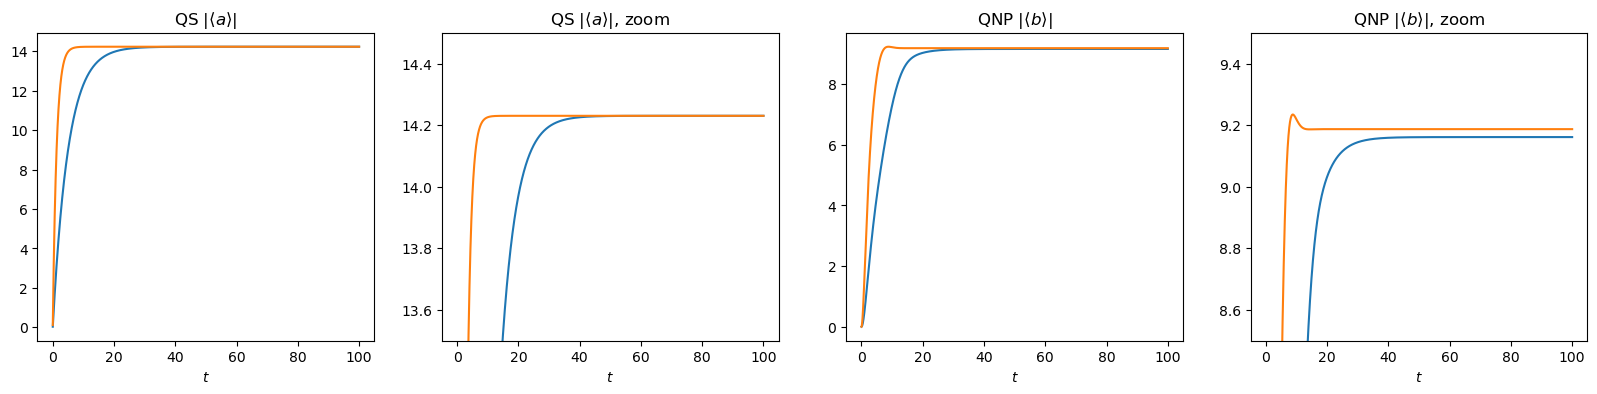

In [8]:
# Plot results
fig, axs = plt.subplots(1, 4, figsize=(20,4))

ax = axs[0]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qsMat[q,0,:]), c=cStr)

ax.set_xlabel(r'$t$')
ax.set_title(r'QS $|\langle a \rangle|$')

ax = axs[1]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qsMat[q,0,:]), c=cStr)

ax.set_ylim([13.5,14.5])
ax.set_xlabel(r'$t$')
ax.set_title(r'QS $|\langle a \rangle|$, zoom')

ax = axs[2]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qnpMat[q,0,:]), c=cStr)

ax.set_xlabel(r'$t$')
ax.set_title(r'QNP $|\langle b \rangle|$')

# Zoom in at long time limit
ax = axs[3]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qnpMat[q,0,:]), c=cStr)

ax.set_ylim([8.5,9.5])
ax.set_xlabel(r'$t$')
ax.set_title(r'QNP $|\langle b \rangle|$, zoom')

plt.show()

### STEOMs simulator<a id='STEOMS' />

<a href=#top>Return to top</a>

In [9]:
def solveSTEOMS(parameters, y0, t0, tF, tS):
    
     # Extract parameters
    [DeltaDA, DeltaDB, Lambda1, gcav, CGamma, ka, gamma1, eta, phiE1, ga, phiA, Nop, Nw] = parameters

    # Array of variable names
    qVarName=["a1","b1","a1D","b1D","Ca1a1","Ca1b1","Cb1b1","Ca1Da1","Ca1Db1","Cb1Da1","Cb1Db1","Ca1Da1D","Ca1Db1D","Cb1Db1D"]
     
    # Define solution vector
    sol = np.zeros( ( int(np.round((tF-t0)/tS))+1,len(qVarName)), dtype=complex )
    
    # Initial condition
    sol[0,:] = y0
    
    # Vector to store noise vectors
    dwTraj = np.zeros( ( int(np.round((tF-t0)/tS))+1,Nw), dtype=complex )
    
    # Time span vector
    T = np.linspace(t0, tF, int(np.round((tF-t0)/tS))+1 )
    
    # Set time increment
    dt = tS
    
    ############################################################################
    
    # Euler integration
    for n in range(0,len(T)):
        
        # Nw stochastic increments (for conditional evolution only)
        dW1 = (np.random.randn(1)*np.sqrt(tS))[0]
        dW2 = (np.random.randn(1)*np.sqrt(tS))[0]
        
        # Store noise trajectory
        dwTraj[n,0] = dW1
        dwTraj[n,1] = dW2
            
        # Define unknowns at previous time step
        # Set current variable values using previous solution
        [a1,b1,a1D,b1D,Ca1a1,Ca1b1,Cb1b1,Ca1Da1,Ca1Db1,Cb1Da1,Cb1Db1,Ca1Da1D,Ca1Db1D,Cb1Db1D] = sol[n-1,:]
        
        # Perform Euler integration step, first-order moments
        sol[n,0:(2*Nop)] = sol[n-1,0:(2*Nop)] + [((Ca1b1 + Cb1Da1)*dW1*np.sqrt(gamma1))/np.sqrt(2) - (dt*(b1*CGamma + a1*(CGamma + ka)))/2. - ((Ca1b1 - Cb1Da1)*dW2*np.sqrt(gamma1)*1j)/np.sqrt(2) + dt*((b1*gcav)/2. + a1*DeltaDA*1j - a1D*ga*1j*(np.cos(phiA) + 1j*np.sin(phiA)) - eta*1j*(np.cos(phiE1) + 1j*np.sin(phiE1))),
      ((Cb1b1 + Cb1Db1)*dW1*np.sqrt(gamma1))/np.sqrt(2) - (dt*(a1*CGamma + b1*(CGamma + gamma1)))/2. - ((Cb1b1 - Cb1Db1)*dW2*np.sqrt(gamma1)*1j)/np.sqrt(2) + dt*(-0.5*(a1*gcav) + b1*DeltaDB*1j + (b1D*(b1**2 + Cb1b1) + 2*b1*Cb1Db1)*1j*Lambda1),
      ((Ca1Db1 + Ca1Db1D)*dW1*np.sqrt(gamma1))/np.sqrt(2) - (dt*(b1D*CGamma + a1D*(CGamma + ka)))/2. - ((Ca1Db1 - Ca1Db1D)*dW2*np.sqrt(gamma1)*1j)/np.sqrt(2) + dt*((b1D*gcav)/2. - a1D*DeltaDA*1j + a1*ga*1j*(np.cos(phiA) - 1j*np.sin(phiA)) + eta*1j*(np.cos(phiE1) - 1j*np.sin(phiE1))),
      (np.sqrt(2)*Cb1Db1*dW1*np.sqrt(gamma1) + np.sqrt(2)*Cb1Db1D*dW1*np.sqrt(gamma1) - a1D*dt*(CGamma + gcav) - np.sqrt(2)*Cb1Db1*dW2*np.sqrt(gamma1)*1j + np.sqrt(2)*Cb1Db1D*dW2*np.sqrt(gamma1)*1j - 2*b1*b1D**2*dt*1j*Lambda1 - 2*b1*Cb1Db1D*dt*1j*Lambda1 - 
         b1D*dt*(CGamma + gamma1 + 2*DeltaDB*1j + 4*Cb1Db1*1j*Lambda1))/2.]
        
         # Perform Euler integration step, second-order moments
        sol[n,(2*Nop):] = sol[n-1,(2*Nop):] + [-0.5*(dt*(2*Ca1a1*CGamma + 2*Ca1b1*CGamma + Ca1b1**2*gamma1 + 2*Ca1b1*Cb1Da1*gamma1 + Cb1Da1**2*gamma1 - 2*Ca1b1*gcav + 2*Ca1a1*ka - 4*Ca1a1*DeltaDA*1j + Ca1b1**2*gamma1*1j**2 - 2*Ca1b1*Cb1Da1*gamma1*1j**2 + Cb1Da1**2*gamma1*1j**2 + 2*(1 + 2*Ca1Da1)*ga*1j*np.cos(phiA) + 
           2*(1 + 2*Ca1Da1)*ga*1j**2*np.sin(phiA))),-0.5*(dt*(Ca1a1*CGamma + 2*Ca1b1*CGamma + Cb1b1*CGamma + Ca1b1*gamma1 + Ca1b1*Cb1b1*gamma1 + Cb1b1*Cb1Da1*gamma1 + Ca1b1*Cb1Db1*gamma1 + Cb1Da1*Cb1Db1*gamma1 + Ca1a1*gcav - Cb1b1*gcav + Ca1b1*ka - 2*Ca1b1*DeltaDA*1j - 2*Ca1b1*DeltaDB*1j + 
           Ca1b1*Cb1b1*gamma1*1j**2 - Cb1b1*Cb1Da1*gamma1*1j**2 - Ca1b1*Cb1Db1*gamma1*1j**2 + Cb1Da1*Cb1Db1*gamma1*1j**2 - 4*b1*b1D*Ca1b1*1j*Lambda1 - 2*b1**2*Cb1Da1*1j*Lambda1 - 2*Cb1b1*Cb1Da1*1j*Lambda1 - 4*Ca1b1*Cb1Db1*1j*Lambda1 + 2*Ca1Db1*ga*1j*np.cos(phiA) + 2*Ca1Db1*ga*1j**2*np.sin(phiA)))
       ,-0.5*(dt*(Cb1Db1**2*gamma1 + 2*Ca1b1*(CGamma + gcav) + Cb1Db1**2*gamma1*1j**2 + Cb1b1**2*gamma1*(1 + 1j**2) - 2*b1**2*1j*Lambda1 - 4*b1**2*Cb1Db1*1j*Lambda1 + 2*Cb1b1*(CGamma + gamma1*(1 + Cb1Db1 - Cb1Db1*1j**2) - 1j*(2*DeltaDB + Lambda1 + 4*b1*b1D*Lambda1 + 6*Cb1Db1*Lambda1)))),
      -0.5*(dt*(2*Ca1Da1*CGamma + Ca1Db1*CGamma + Cb1Da1*CGamma + Ca1b1*Ca1Db1*gamma1 + Ca1b1*Ca1Db1D*gamma1 + Ca1Db1*Cb1Da1*gamma1 + Ca1Db1D*Cb1Da1*gamma1 - Ca1Db1*gcav - Cb1Da1*gcav + 2*Ca1Da1*ka + Ca1b1*Ca1Db1*gamma1*1j**2 - Ca1b1*Ca1Db1D*gamma1*1j**2 - Ca1Db1*Cb1Da1*gamma1*1j**2 + 
           Ca1Db1D*Cb1Da1*gamma1*1j**2 - 2*(Ca1a1 - Ca1Da1D)*ga*1j*np.cos(phiA) + 2*(Ca1a1 + Ca1Da1D)*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(Ca1Da1*CGamma + 2*Ca1Db1*CGamma + Cb1Db1*CGamma + Ca1Db1*gamma1 + Ca1Db1*Cb1b1*gamma1 + Ca1Db1D*Cb1b1*gamma1 + Ca1Db1*Cb1Db1*gamma1 + Ca1Db1D*Cb1Db1*gamma1 + Ca1Da1*gcav - Cb1Db1*gcav + Ca1Db1*ka + 2*Ca1Db1*DeltaDA*1j - 2*Ca1Db1*DeltaDB*1j + Ca1Db1*Cb1b1*gamma1*1j**2 - 
           Ca1Db1D*Cb1b1*gamma1*1j**2 - Ca1Db1*Cb1Db1*gamma1*1j**2 + Ca1Db1D*Cb1Db1*gamma1*1j**2 - 4*b1*b1D*Ca1Db1*1j*Lambda1 - 2*b1**2*Ca1Db1D*1j*Lambda1 - 2*Ca1Db1D*Cb1b1*1j*Lambda1 - 4*Ca1Db1*Cb1Db1*1j*Lambda1 - 2*Ca1b1*ga*1j*np.cos(phiA) + 2*Ca1b1*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(Ca1Da1*CGamma + 2*Cb1Da1*CGamma + Cb1Db1*CGamma + Cb1Da1*gamma1 + Ca1b1*Cb1Db1*gamma1 + Cb1Da1*Cb1Db1*gamma1 + Ca1b1*Cb1Db1D*gamma1 + Cb1Da1*Cb1Db1D*gamma1 + Ca1Da1*gcav - Cb1Db1*gcav + Cb1Da1*ka - 2*Cb1Da1*DeltaDA*1j + 2*Cb1Da1*DeltaDB*1j + Ca1b1*Cb1Db1*gamma1*1j**2 - 
           Cb1Da1*Cb1Db1*gamma1*1j**2 - Ca1b1*Cb1Db1D*gamma1*1j**2 + Cb1Da1*Cb1Db1D*gamma1*1j**2 + 2*b1D**2*Ca1b1*1j*Lambda1 + 4*b1*b1D*Cb1Da1*1j*Lambda1 + 4*Cb1Da1*Cb1Db1*1j*Lambda1 + 2*Ca1b1*Cb1Db1D*1j*Lambda1 + 2*Ca1Db1D*ga*1j*np.cos(phiA) + 2*Ca1Db1D*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(2*Cb1Db1*CGamma + 2*Cb1Db1*gamma1 + Cb1b1*Cb1Db1*gamma1 + Cb1Db1**2*gamma1 + Cb1b1*Cb1Db1D*gamma1 + Cb1Db1*Cb1Db1D*gamma1 + Ca1Db1*(CGamma + gcav) + Cb1Da1*(CGamma + gcav) + Cb1b1*Cb1Db1*gamma1*1j**2 - Cb1Db1**2*gamma1*1j**2 - Cb1b1*Cb1Db1D*gamma1*1j**2 + 
           Cb1Db1*Cb1Db1D*gamma1*1j**2 + 2*b1D**2*Cb1b1*1j*Lambda1 - 2*b1**2*Cb1Db1D*1j*Lambda1)),-0.5*(dt*(2*Ca1Da1D*CGamma + 2*Ca1Db1D*CGamma + Ca1Db1**2*gamma1 + 2*Ca1Db1*Ca1Db1D*gamma1 + Ca1Db1D**2*gamma1 - 2*Ca1Db1D*gcav + 2*Ca1Da1D*ka + 4*Ca1Da1D*DeltaDA*1j + Ca1Db1**2*gamma1*1j**2 - 
           2*Ca1Db1*Ca1Db1D*gamma1*1j**2 + Ca1Db1D**2*gamma1*1j**2 - 2*(1 + 2*Ca1Da1)*ga*1j*np.cos(phiA) + 2*(1 + 2*Ca1Da1)*ga*1j**2*np.sin(phiA))),
      -0.5*(dt*(Ca1Da1D*CGamma + 2*Ca1Db1D*CGamma + Cb1Db1D*CGamma + Ca1Db1D*gamma1 + Ca1Db1*Cb1Db1*gamma1 + Ca1Db1D*Cb1Db1*gamma1 + Ca1Db1*Cb1Db1D*gamma1 + Ca1Db1D*Cb1Db1D*gamma1 + Ca1Da1D*gcav - Cb1Db1D*gcav + Ca1Db1D*ka + 2*Ca1Db1D*DeltaDA*1j + 2*Ca1Db1D*DeltaDB*1j + 
           Ca1Db1*Cb1Db1*gamma1*1j**2 - Ca1Db1D*Cb1Db1*gamma1*1j**2 - Ca1Db1*Cb1Db1D*gamma1*1j**2 + Ca1Db1D*Cb1Db1D*gamma1*1j**2 + 2*b1D**2*Ca1Db1*1j*Lambda1 + 4*b1*b1D*Ca1Db1D*1j*Lambda1 + 4*Ca1Db1D*Cb1Db1*1j*Lambda1 + 2*Ca1Db1*Cb1Db1D*1j*Lambda1 - 2*Cb1Da1*ga*1j*np.cos(phiA) + 
           2*Cb1Da1*ga*1j**2*np.sin(phiA))),-0.5*(dt*(Cb1Db1**2*gamma1 + 2*Ca1Db1D*(CGamma + gcav) + Cb1Db1**2*gamma1*1j**2 + Cb1Db1D**2*gamma1*(1 + 1j**2) + 2*b1D**2*1j*Lambda1 + 4*b1D**2*Cb1Db1*1j*Lambda1 + 
           2*Cb1Db1D*(CGamma + gamma1*(1 + Cb1Db1 - Cb1Db1*1j**2) + 1j*(2*DeltaDB + Lambda1 + 4*b1*b1D*Lambda1 + 6*Cb1Db1*Lambda1))))]
                
    ############################################################################
    
    return sol, T, qVarName, dwTraj

In [11]:
# Simulation parameters

# Total no. of modes
Nop = 2

# Number of readout operators
Nw = 2

# Time evolution parameters
t0, tF, tS = 0.0, 100.0, 0.01
T = np.linspace(t0, tF, int(np.round((tF-t0)/tS))+1 )

# Initial condition
y0 = np.zeros(3*Nop + 2*(Nop**2))

# Fixed QS parameters
DeltaDA, ka, ga, phiE1 = 0.0, 0.5, 0.3, np.pi/2

# Fixed QNP parameters
DeltaDB, Lambda1, gamma1 = -2/3, 0.01, 1.0

# Overall amplitude scaling factor 
A = 45.0/np.sqrt(10)

# Fixed coupling parameters (set gcav = CGamma)
gcav, CGamma = 0.5, 0.5

# Variable parameters that determine the two QS states
eta_1, phiA_1 = 0.2*A, +np.pi/2
eta_2, phiA_2 = 0.8*A, -np.pi/2
stateParams = np.array([[eta_1, phiA_1],
                        [eta_2, phiA_2]])

# Number of states to distinguish
C = np.shape(stateParams)[0]

# Number of trajectories to simulate
NTraj = 1000

# Storage arrays for quantum trajectories
qsMatC  = np.zeros((NTraj,C,3,len(T)), dtype=complex)
qnpMatC = np.zeros((NTraj,C,3,len(T)), dtype=complex)

# Storage array for raw heterodyne measurement records
JMat = np.zeros((NTraj,C,2,len(T)), dtype=complex)

# Loop over states
sT = time.time()
for q in range(C):

    # Extract parameters defining this state
    eta, phiA = stateParams[q,:]

    # Assemble parameters for this QS state
    parameters = [DeltaDA, DeltaDB, Lambda1, gcav, CGamma, ka, gamma1, eta, phiE1, ga, phiA, Nop, Nw]

    # Simulate NTraj trajectories
    for n in range(NTraj):

        # Simulate
        sol, T, qVarName, dwTraj = solveSTEOMS(parameters, y0, t0, tF, tS)

        # Store results for QS dynamics
        qsMatC[n,q,0,:] = sol[:,qVarName.index('a1')]
        qsMatC[n,q,1,:] = sol[:,qVarName.index('Ca1a1')]
        qsMatC[n,q,2,:] = sol[:,qVarName.index('Ca1Da1')]

        # Store results for QNP dynamics
        qnpMatC[n,q,0,:] = sol[:,qVarName.index('b1')]
        qnpMatC[n,q,1,:] = sol[:,qVarName.index('Cb1b1')]
        qnpMatC[n,q,2,:] = sol[:,qVarName.index('Cb1Db1')]

        # Store raw heterodyne measurement records
        JMat[n,q,0,:] = np.real( np.sqrt(gamma1/2)*(     sol[:,qVarName.index('b1')] +    sol[:,qVarName.index('b1D')]  ) + dwTraj[:,0]/tS )
        JMat[n,q,1,:] = np.real( np.sqrt(gamma1/2)*( -1j*sol[:,qVarName.index('b1')] + 1j*sol[:,qVarName.index('b1D')]  ) + dwTraj[:,1]/tS )

eT = time.time()
print("Done simulating TEOMs! Elapsed time: " + str(eT-sT))

Done simulating TEOMs! Elapsed time: 2319.9433221817017


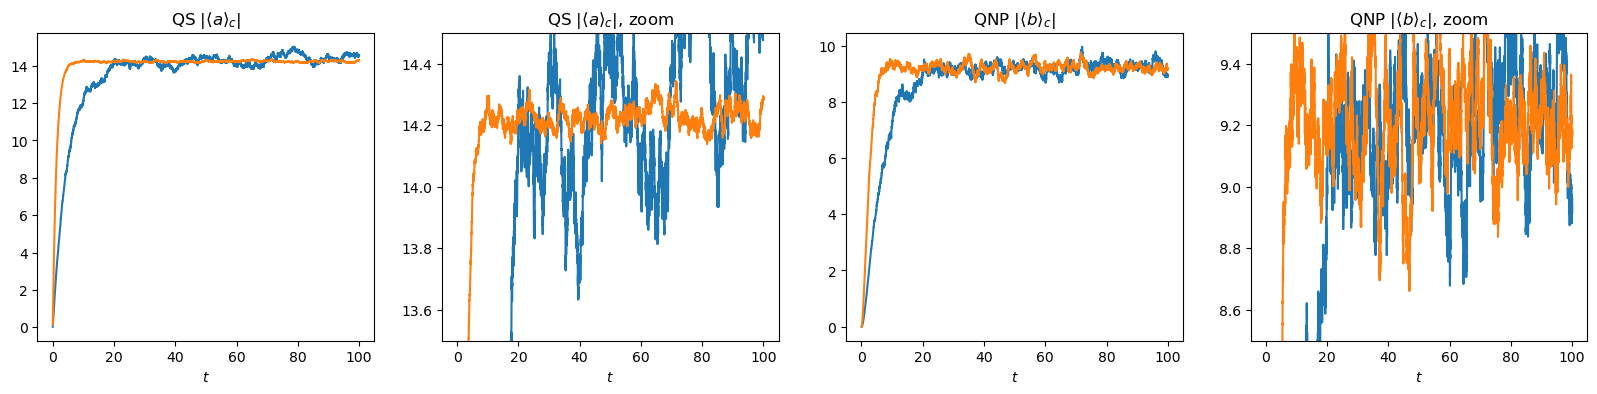

In [15]:
# Plot quantum trajectories 
fig, axs = plt.subplots(1, 4, figsize=(20,4))

# Trajectory to plot
npl = 0

ax = axs[0]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qsMatC[npl,q,0,:]), c=cStr)

ax.set_xlabel(r'$t$')
ax.set_title(r'QS $|\langle a \rangle_c|$')

ax = axs[1]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qsMatC[npl,q,0,:]), c=cStr)

ax.set_ylim([13.5,14.5])
ax.set_xlabel(r'$t$')
ax.set_title(r'QS $|\langle a \rangle_c|$, zoom')

ax = axs[2]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qnpMatC[npl,q,0,:]), c=cStr)

ax.set_xlabel(r'$t$')
ax.set_title(r'QNP $|\langle b \rangle_c|$')

# Zoom in at long time limit
ax = axs[3]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, np.abs(qnpMatC[npl,q,0,:]), c=cStr)

ax.set_ylim([8.5,9.5])
ax.set_xlabel(r'$t$')
ax.set_title(r'QNP $|\langle b \rangle_c|$, zoom')

plt.show()

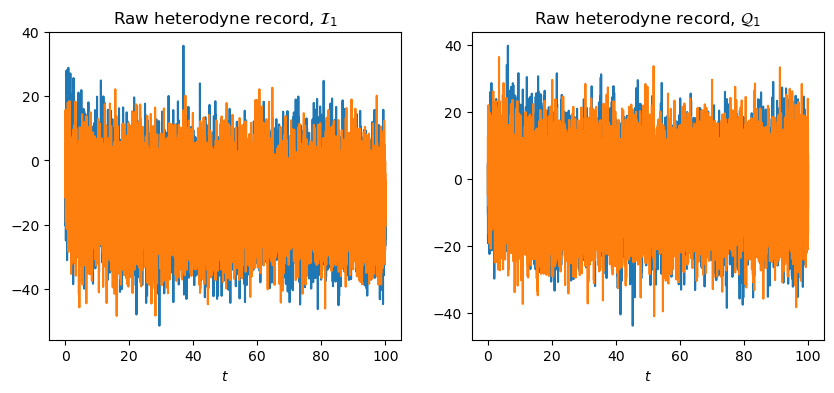

In [16]:
# Plot quantum trajectories and raw heterodyne records
fig, axs = plt.subplots(1, 2, figsize=(10,4))

ax = axs[0]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, JMat[npl,q,0,:], c=cStr)

ax.set_title(r'Raw heterodyne record, $\mathcal{I}_1$')
ax.set_xlabel(r'$t$')

ax = axs[1]
for q in range(C):
    cStr = 'C' + str(q)
    ax.plot(T, JMat[npl,q,1,:], c=cStr)

ax.set_title(r'Raw heterodyne record, $\mathcal{Q}_1$')
ax.set_xlabel(r'$t$')

plt.show()

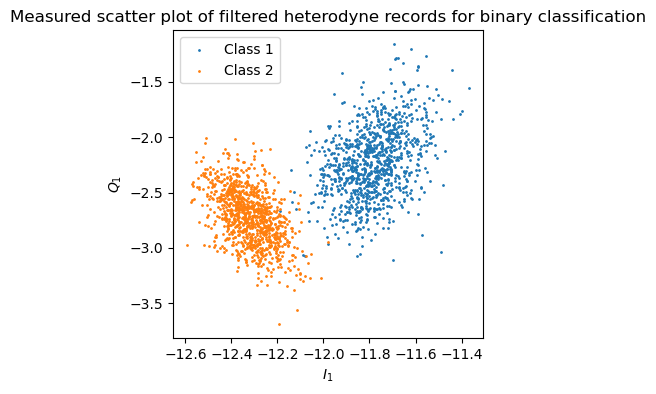

In [18]:
# Post-processing

# Storage array for filtered heterodyne measurement records
IMat = np.zeros((NTraj,C,2), dtype=complex)

for q in range(C):
    for n in range(NTraj):
        IMat[n,q,0] = np.sum(JMat[n,q,0,:])/len(T)
        IMat[n,q,1] = np.sum(JMat[n,q,1,:])/len(T)

# Scatter plot of filtered heterodyne measurement records
fig, ax = plt.subplots(1, 1, figsize=(4,4))

for q in range(C):
    cStr = 'C' + str(q)
    ax.scatter(IMat[:,q,0],IMat[:,q,1], s=1, color=cStr)

ax.set_title('Measured scatter plot of filtered heterodyne records for binary classification')
ax.set_xlabel(r'$I_1$')
ax.set_ylabel(r'$Q_1$')

ax.legend(['Class 1', 'Class 2'])

plt.show()